# Top Companies Bar Plot (2.20.1) - Problem

2️⃣ Advanced - Seaborn 🌊

Problem Statement:
Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.

In [22]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import seaborn as sns 
import matplotlib.pyplot as plt 


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

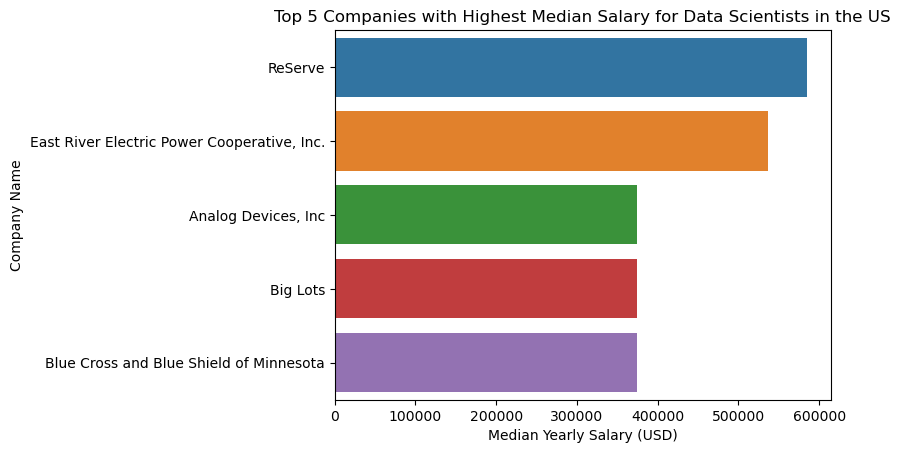

In [28]:
#Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

top_companies = df_DA_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name', hue='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()
